/tmp/ipython-input-2609252655.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(y='Region', x='Happiness Score', data=df_plot,


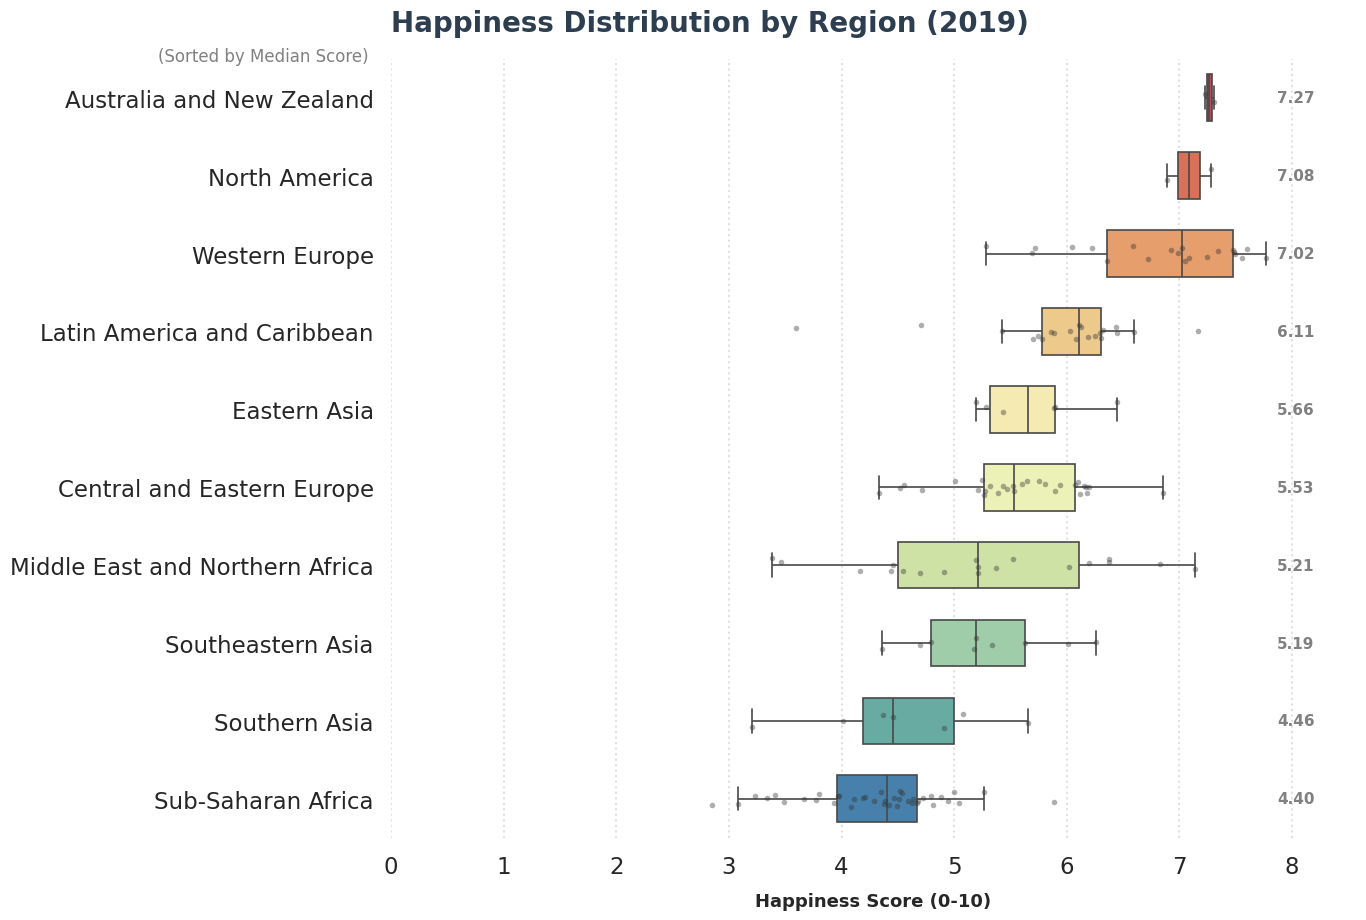

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load Datasets
# We use 2015 data to get the 'Region' information and 2019 data for the actual scores.
df_2015 = pd.read_csv('/content/2015.csv')
df_2019 = pd.read_csv('/content/2019.csv')

# 2. Map Region Information to 2019 Data
# Create a dictionary mapping countries to regions from the 2015 dataset
region_map = dict(zip(df_2015['Country'], df_2015['Region']))

# Create a new 'Region' column in the 2019 dataset using the map
df_2019['Region'] = df_2019['Country or region'].map(region_map)

# Manually fix missing regions for countries that have different names or are new in 2019
manual_fix = {
    'Trinidad & Tobago': 'Latin America and Caribbean',
    'Northern Cyprus': 'Western Europe',
    'North Macedonia': 'Central and Eastern Europe',
    'Somalia': 'Sub-Saharan Africa',
    'Namibia': 'Sub-Saharan Africa',
    'Gambia': 'Sub-Saharan Africa',
    'South Sudan': 'Sub-Saharan Africa',
    'Taiwan Province of China': 'Eastern Asia',
    'Hong Kong S.A.R. of China': 'Eastern Asia'
}
df_2019['Region'] = df_2019['Region'].fillna(df_2019['Country or region'].map(manual_fix))

# Drop rows where Region is still missing (to avoid errors in plotting)
df_plot = df_2019.dropna(subset=['Region']).copy()

# Rename 'Score' to 'Happiness Score' for consistency
df_plot.rename(columns={'Score': 'Happiness Score'}, inplace=True)

# 3. Style Settings
sns.set_theme(style="whitegrid", context="talk")

# 4. Sort Regions by Median Happiness Score
median_order = df_plot.groupby('Region')['Happiness Score'].median().sort_values(ascending=False).index

# 5. Create Plot Area
plt.figure(figsize=(14, 10))

# 6. Create Boxplot
ax = sns.boxplot(y='Region', x='Happiness Score', data=df_plot,
                 order=median_order,
                 palette='Spectral',
                 linewidth=1.2,
                 width=0.6,
                 fliersize=0) # Hide outliers (we will show them with stripplot)

# 7. Add Stripplot (Individual Data Points)
sns.stripplot(y='Region', x='Happiness Score', data=df_plot,
              order=median_order,
              color='#333333',
              alpha=0.4,
              size=4,
              jitter=True)

# 8. Add Median Values as Text
medians = df_plot.groupby('Region')['Happiness Score'].median()
for i, region in enumerate(median_order):
    med_val = medians[region]
    plt.text(x=df_plot['Happiness Score'].max() + 0.1, y=i,
             s=f'{med_val:.2f}',
             verticalalignment='center',
             fontdict={'size':11, 'color':'grey', 'weight':'bold'})

# 9. Titles and Labels
plt.title('Happiness Distribution by Region (2019)',
          fontsize=20, fontweight='bold', loc='left', pad=20, color='#2c3e50')

plt.suptitle('(Sorted by Median Score)',
             x=0.125, y=0.89, ha='left', fontsize=12, color='grey')

plt.xlabel('Happiness Score (0-10)', fontsize=13, labelpad=10, fontweight='bold')
plt.ylabel('') # Y-axis label is not needed as region names are self-explanatory

# 10. Final Adjustments
plt.xlim(0, df_plot['Happiness Score'].max() + 0.8) # Add space for text on the right
sns.despine(left=True, bottom=True)
plt.grid(axis='x', linestyle=':', alpha=0.6)

plt.tight_layout()
plt.show()